### 泰坦尼克号

## 一、数据分析

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#返回每列列名，该列非nan值个数，以及该列类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


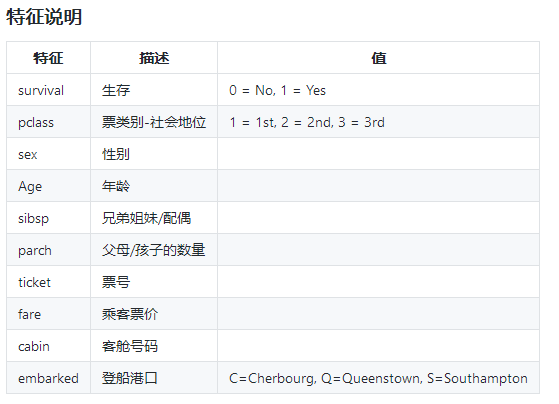

In [5]:
test.info()  #返回每列列名，该列非nan值个数，以及该列类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#返回数值型变量的统计量
train.describe(percentiles = [0.00,0.25,0.5,0.75,1.00])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
100%,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe()#即是上面的统计量的简单形式

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 特征分析（统计学与绘图）

目的：初步了解数据之间的相关性，为构造特征工程以及模型建立做准备

In [8]:
#存活人数
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 1)数值型数据协方差,corr()函数

来个总览，快速了解各数据的相关性

In [9]:
#相关性协方差表，corr()函数，返回结果接近0说明无相关性，大于0说明是正相关，小于0是负相关
train_corr = train.drop('PassengerId',axis = 1).corr()  #去掉PassengerId这一列
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


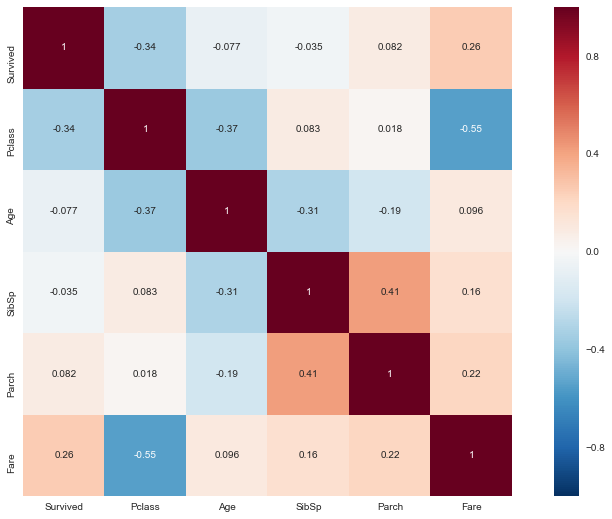

In [10]:
#画出相关性热力图
a = plt.subplots(figsize = (15,9)) #调整画布大小
a = sns.heatmap(train_corr,vmin =-1,vmax = 1,annot = True,square = True)#画热力图

####  2)各个数据与结果的关系

进一步探索分析各个数据与结果的关系

- ① Pclass,乘客等级,1是最高级

In [11]:
train.groupby(['Pclass'])['Pclass','Survived'].mean()  #访问Pclass这一列，按Pclass和Survived进行分组

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


结果分析:可以看出Survived和Pclass在Pclass=1的时候有较强的相关性（>0.5），所以最终模型中包含该特征。

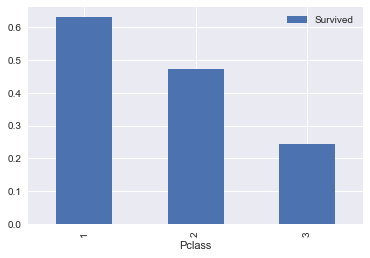

In [12]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()  #对Pclass按存活率进行柱状图统计

- ② Sex,性别

In [13]:
train.groupby(['Sex'])['Sex','Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


结果分析:女性有更高生存率（74%），保留该特征

- ③ SibSp and Parch 兄妹配偶数/父母子女数

In [14]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()  #兄弟姐妹/配偶

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
train.groupby(['SibSp'])['SibSp','Survived'].mean()

,SibSp,Survived
SibSp,,
0,0.0,0.345395
1,1.0,0.535885
2,2.0,0.464286
3,3.0,0.250000
4,4.0,0.166667
5,5.0,0.000000
8,8.0,0.000000


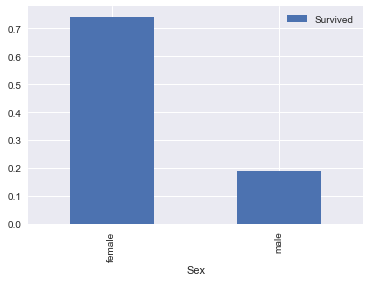

In [16]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [17]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征

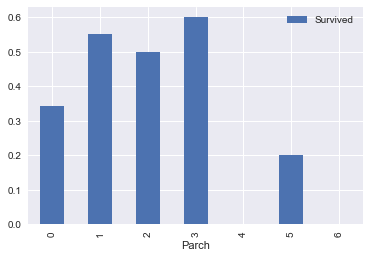

In [18]:
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()  #父母/孩子数量

- ④ Age年龄与生存情况的分析

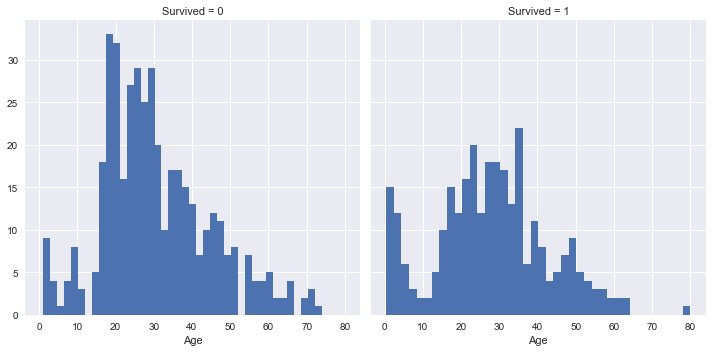

In [19]:
g = sns.FacetGrid(train,col = 'Survived',size = 5)
g.map(plt.hist,'Age',bins = 40)

结果分析:由图,可以看到年龄是影响生存情况的.

但是年龄是有大部分缺失值的,缺失值需要进行处理,可以使用填充或者模型预测.

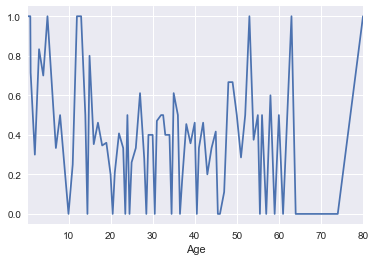

In [20]:
train.groupby(['Age'])['Survived'].mean().plot()

- ⑤ Embarked登港港口与生存情况分析   

结果分析:C地的生存率更高,这个也应该保留为模型特征.

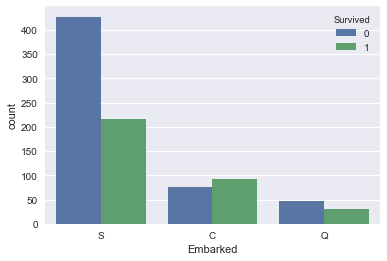

In [21]:
sns.countplot('Embarked',hue = 'Survived',data = train)

- ⑥ 其他因素

在数据的Name项中包含了对该乘客的称呼，如Mr,Miss等，这些信息包含了乘客的年龄、性别、也有可能包含社会地位，如
Dr、Lady、Major、Master等称呼。这一项不方便用图表显示，但是在特征工程中，我们会将其提取出来，然后放到模型中。

剩余因素还有船票价格、船舱号和船票号，这三个因素都可能会影响乘客在船中的位置从而影响逃生顺序，但是因为这三个因素与设生存之间看不出明显规律，所以在后期模型融合时，**将这些因素交给模型来决定其重要性。**

## 二、特征工程

In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
train.isnull().any()  #查看train数据集中哪些列有缺失值

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [25]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [26]:
#先将数据集合并，一起做特征工程（注意，标准化的时候需要分开处理）
#先将test补齐，然后通过pd.append()合并
test['Survived'] = 0
train_test = train.append(test)  #合并train和test数据集，得到更多的数据去预测年龄中的缺失值
#train_test.head(10)

### 特征处理

- ① Pclass，乘客等级，1是最高级  

两种方式：一是该特征不做处理，可以直接保留，二是再处理：也进行分列处理（比较哪种方式模型效果更好，就选哪种）

In [27]:
train_test = pd.get_dummies(train_test,columns = ['Pclass'])  #进行分列处理

In [28]:
train_test.head(10)  #Pclass按照1,2,3等级做了哑编码处理Pclass_1,Pclass_2,Pclass_3

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,female,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,female,1,1,113803,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,male,0,0,373450,0,0,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,male,0,0,330877,0,0,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,male,0,0,17463,1,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,male,3,0,349909,0,0,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,female,0,1,347742,0,0,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,female,1,1,237736,0,1,0


- ② Sex，性别无缺失值，直接分列

In [29]:
train_test = pd.get_dummies(train_test,columns = ['Sex'])

In [30]:
train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,PC 17599,1,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,1,STON/O2. 3101282,0,0,1,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,113803,1,0,0,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,0,0,373450,0,0,1,0,1


- ③ SibSp and Parch兄妹配偶数/父母子女数

第一次直接保留：这两个都影响生存率，且都是数值型，先直接保存。  

第二次进行两项求和，并进行分列处理。（兄妹配偶数父母子女数都是认识人的数量,所以总数可能也会更好)(模型结果提高到了）

In [31]:
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']  #把SibSp和Parch列的数值进行相加

In [32]:
train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_Parch
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,1,0,1,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,PC 17599,1,0,0,1,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,1,STON/O2. 3101282,0,0,1,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,113803,1,0,0,1,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,0,0,373450,0,0,1,0,1,0


In [33]:
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch'])

In [34]:
train_test.head()

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Parch_9,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,1,0,0,0,0,0,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,1,0,0,0,0,0,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,1,0,0,0,0,0,0,0,0


## 补充内容：哑编码的columns设置结果

这里我们以test测试集为例，查看原来的数据情况。  

只是为了看清train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch'])这个操作啥意思

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [36]:
'''columns中设置Parch，会发现结果共有Parch_1～Parch_9共9个属性，是因为Parch中最大值为9'''
test2 = pd.get_dummies(test,columns = ['Parch'])
test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Survived,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,892,3,"Kelly, Mr. James",male,34.5,0,330911,7.8292,NaN,Q,0,1,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,363272,7.0000,NaN,S,0,1,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,240276,9.6875,NaN,Q,0,1,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,315154,8.6625,NaN,S,0,1,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,3101298,12.2875,NaN,S,0,0,1,0,0,0,0,0,0


In [37]:
test['Parch'].value_counts()   #Parch中最大数值为9

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [38]:
test['SibSp'].value_counts()  #SibSb中最大数值为8

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [39]:
test3 = pd.get_dummies(test,columns = ['SibSp'])
test3.head()   #可以看到哑编码处理后，出现8个属性：SibSp_1～SibSp_8

,PassengerId,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,Survived,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,892,3,"Kelly, Mr. James",male,34.5,0,330911,7.8292,NaN,Q,0,1,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,363272,7.0000,NaN,S,0,0,1,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,240276,9.6875,NaN,Q,0,1,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,315154,8.6625,NaN,S,0,1,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,3101298,12.2875,NaN,S,0,0,1,0,0,0,0,0


- ④ Embarked数据有极少量（2个）缺失值，但是在分列的时候，缺失值的所有列可以均为0，所以可以考虑不填充。  

另外，也可以考虑用测试集众数来填充。先找出众数，再采用df.fillna()方法

In [40]:
train_test[train_test['Embarked'].isnull().values ==True]  #我发现Embarked的缺失值实际为2个

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Parch_9,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",62,1,113572,1,0,...,0,1,0,0,0,0,0,0,0,0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,113572,1,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
train_test['Embarked'].value_counts()   #S型是众数，所以缺失值填充时NAN可以用S进行填充

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [42]:
train_test = pd.get_dummies(train_test,columns = ['Embarked'])  #增加了3列
train_test.head()

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,0,0,0,0,0,0,0,1


- ⑤ Name

1. 在数据的Name项中包含了对该乘客的称呼，将这些关键词提取出来，然后做分列处理（参考别人的）

In [43]:
#从名字中提取出称呼：df['Name'].str.extract()是提取函数，配合正则一起使用
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

In [44]:
train_test['Name1'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Mme               1
Sir               1
Capt              1
Lady              1
Dona              1
Don               1
the Countess      1
Name: Name1, dtype: int64

In [45]:
train_test['Name1'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Name1, dtype: object

In [46]:
train_test['Name'].value_counts() #先看下之前为正则处理未提取名字称呼时的情况

Kelly, Mr. James                                        2
Connolly, Miss. Kate                                    2
Andrew, Mr. Frank Thomas                                1
Spedden, Master. Robert Douglas                         1
Petterson, Mr. Johan Emil                               1
Sadlier, Mr. Matthew                                    1
Zakarian, Mr. Mapriededer                               1
Allen, Miss. Elisabeth Walton                           1
Green, Mr. George Henry                                 1
Ford, Mr. Arthur                                        1
Samaan, Mr. Elias                                       1
Lefebre, Mrs. Frank (Frances)                           1
Bjorklund, Mr. Ernst Herbert                            1
Murdlin, Mr. Joseph                                     1
Bissette, Miss. Amelia                                  1
Culumovic, Mr. Jeso                                     1
Jensen, Mr. Niels Peder                                 1
Murphy, Miss. 

In [47]:
#将姓名分类处理
train_test['Name1'].replace(['Capt','Col','Major','Dr','Rev','Don','Sir','the Countess','Jonkheer'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Mme', 'Mrs'], 'Mrs',inplace = True)
train_test['Name1'].replace(['Mlle','Ms', 'Miss','Dona','Lady'], 'Miss',inplace = True)
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [48]:
#分列处理
train_test = pd.get_dummies(train_test,columns = ['Name1'])
train_test.head(10)

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,SibSp_Parch_7,SibSp_Parch_10,Embarked_C,Embarked_Q,Embarked_S,Name1_Master,Name1_Miss,Name1_Mr,Name1_Mrs,Name1_Officer
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,0,0,0,1,0,0,0,1,0,0
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,0,0,0,1,1,0,0,0,0
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,0,0,0,1,0,0,0,1,0
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,0,0,1,0,0,0,0,0,1,0


2.从姓名中提取出姓做特征

In [49]:
train_test['Name'].head(10)  #未提取姓氏的原数据前10行情况

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [50]:
#从姓名中提取出姓
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])

In [51]:
train_test['Name2'].head(10)  #经过提取姓氏的数据情况
#试试运行train_test['Name2'].value_counts()

0                               Owen Harris
1     John Bradley (Florence Briggs Thayer)
2                                     Laina
3             Jacques Heath (Lily May Peel)
4                             William Henry
5                                     James
6                                 Timothy J
7                             Gosta Leonard
8       Oscar W (Elisabeth Vilhelmina Berg)
9                    Nicholas (Adele Achem)
Name: Name2, dtype: object

In [52]:
#计算数量，然后合并数据集
Name2_sum = train_test['Name2'].value_counts().reset_index()  #重新设置索引
Name2_sum.head() 

,index,Name2
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Mary,7


In [53]:
#计算数量，然后合并数据集
Name2_sum.columns = ['Name2','Name2_sum']  #对列进行重新命名
Name2_sum.head()  #查看前5行

,Name2,Name2_sum
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Mary,7


In [54]:
#计算数量，然后合并数据集
train_test = pd.merge(train_test,Name2_sum,how = 'left',on = 'Name2')  #合并

In [55]:
train_test.head()  #查看前5行

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Embarked_C,Embarked_Q,Embarked_S,Name1_Master,Name1_Miss,Name1_Mr,Name1_Mrs,Name1_Officer,Name2,Name2_sum
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,1,0,0,1,0,0,Owen Harris,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,1,0,0,0,0,0,1,0,John Bradley (Florence Briggs Thayer),1
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,0,1,0,1,0,0,0,Laina,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,1,0,0,0,1,0,Jacques Heath (Lily May Peel),1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,1,0,0,1,0,0,William Henry,6


In [56]:
train_test['Name2'].value_counts()

 John                                                   15
 William                                                11
 Patrick                                                10
 James                                                   9
 Mary                                                    7
 Joseph                                                  7
 William Henry                                           6
 Ivan                                                    6
 Samuel                                                  5
 Harry                                                   5
 Kate                                                    5
 Albert                                                  4
 Edward                                                  4
 William John                                            4
 George                                                  4
 Martin                                                  4
 Bertha                                                 

In [57]:
#由于出现一次时该特征是无效特征，用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum'] == 1,'Name2_new'] = 'one'
#train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
#del train_test['Name2']
train_test.head(10)


,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Name1_Master,Name1_Miss,Name1_Mr,Name1_Mrs,Name1_Officer,Name2,Name2_sum,Name2_new
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,1,0,0,1,0,0,Owen Harris,1,one
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,0,0,0,1,0,John Bradley (Florence Briggs Thayer),1,one
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,1,0,1,0,0,0,Laina,1,one
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,1,0,0,0,1,0,Jacques Heath (Lily May Peel),1,one
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,1,0,0,1,0,0,William Henry,6,NaN
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,1,0,0,0,1,0,0,James,9,NaN
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,1,0,0,1,0,0,Timothy J,1,one
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,1,1,0,0,0,0,Gosta Leonard,1,one
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,1,0,0,0,1,0,Oscar W (Elisabeth Vilhelmina Berg),1,one
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,0,0,0,0,0,1,0,Nicholas (Adele Achem),1,one


In [58]:
#由于出现一次时该特征是无效特征，用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum']>1, 'Name2_new'] = train_test['Name2']  #姓氏出现次数大于1的保留该姓
train_test.head(10)

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Name1_Master,Name1_Miss,Name1_Mr,Name1_Mrs,Name1_Officer,Name2,Name2_sum,Name2_new
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,1,0,0,1,0,0,Owen Harris,1,one
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,0,0,0,1,0,John Bradley (Florence Briggs Thayer),1,one
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,1,0,1,0,0,0,Laina,1,one
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,1,0,0,0,1,0,Jacques Heath (Lily May Peel),1,one
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,1,0,0,1,0,0,William Henry,6,William Henry
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,1,0,0,0,1,0,0,James,9,James
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,1,0,0,1,0,0,Timothy J,1,one
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,1,1,0,0,0,0,Gosta Leonard,1,one
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,1,0,0,0,1,0,Oscar W (Elisabeth Vilhelmina Berg),1,one
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,0,0,0,0,0,1,0,Nicholas (Adele Achem),1,one


In [59]:
#由于出现一次时该特征是无效特征，用one来代替出现一次的姓
del train_test['Name2']  #删除了‘Name2’这列
train_test.head(10)

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Embarked_C,Embarked_Q,Embarked_S,Name1_Master,Name1_Miss,Name1_Mr,Name1_Mrs,Name1_Officer,Name2_sum,Name2_new
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,1,0,0,1,0,0,1,one
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,1,0,0,0,0,0,1,0,1,one
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,0,1,0,1,0,0,0,1,one
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,1,0,0,0,1,0,1,one
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,1,0,0,1,0,0,6,William Henry
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,0,1,0,0,0,1,0,0,9,James
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,0,1,0,0,1,0,0,1,one
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,0,1,1,0,0,0,0,1,one
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,0,1,0,0,0,1,0,1,one
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,1,0,0,0,0,0,1,0,1,one


In [60]:
train_test['Name2_new'].value_counts()  #查看一下大于1的和等于1的姓氏的统计情况(1个one,其他姓出现次数大于1的有88个)

one                   1038
 John                   15
 William                11
 Patrick                10
 James                   9
 Joseph                  7
 Mary                    7
 Ivan                    6
 William Henry           6
 Samuel                  5
 Harry                   5
 Kate                    5
 William John            4
 Martin                  4
 Edward                  4
 Tannous                 4
 Bertha                  4
 Albert                  4
 George                  4
 Bridget                 3
 Karl Johan              3
 David                   3
 Benjamin                3
 Emil                    3
 Anna Sofia              3
 Elizabeth               3
 Alfred                  3
 Hanna                   3
 Thomas                  3
 Thomas Henry            3
                      ... 
 Robert Douglas          2
 Sarkis                  2
 Marija                  2
 Ellen "Nellie"          2
 August                  2
 Hanora "Nora"           2
 

In [61]:
#分列处理
train_test = pd.get_dummies(train_test,columns = ['Name2_new'])

In [62]:
train_test.head(10)

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
#删掉姓名这个特征
del train_test['Name']

- ⑥ Fare  

该特征有缺失值，先找出缺失值的那行数据，然后用平均数填充

In [64]:
#从上面的分析，发现该特征train集无miss值，test有一个缺失值，先查看
train_test.loc[train_test['Fare'].isnull()]  #或者train_test[train_test['Fare'].isnull()]

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,60.5,NaN,NaN,1044,0,3701,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#票价与Pclass和Embarked有关，所以用train分组后的平均数填充
train.groupby(by = ['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [66]:
#用Pclass=3和Embarked=S的平均数14.644083来填充 （Pclass=3是众数，Embarked=S是众数，用众数的平均数来填充）
train_test['Fare'].fillna(14.644083,inplace = True)  #inplace = Place表示原数据已被平均数填充，没有这个就表示原数据没有被填充（改变）

- ⑦ Ticket  

该列和名字做类似的处理，先提取，然后分列

In [67]:
train_test.head(10)  #前10行情况（Fare表示乘客票价）

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
0,22.0,NaN,7.2500,1,0,A/5 21171,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,2,1,PC 17599,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,26.0,NaN,7.9250,3,1,STON/O2. 3101282,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,4,1,113803,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,5,0,373450,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,NaN,NaN,8.4583,6,0,330877,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,51.8625,7,0,17463,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,NaN,21.0750,8,0,349909,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,27.0,NaN,11.1333,9,1,347742,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
9,14.0,NaN,30.0708,10,1,237736,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [68]:
train_test['Ticket'].head(20) 

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [69]:
type(train_test['Ticket'])

pandas.core.series.Series

In [70]:
#将Ticket提取字符列
#str.isnumeric() 如果S中只有数字字符，则返回True，否则返回false
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
"""
Series.str会将每一行中的内容当成字符串来看待。
Series.str.split()会将每一行的列表当成字符.

Series.str[0]是返回每一行第一个字符
Series.str.split(" ").str[0] 返回的是分割之后列表的第一个元素
"""
#如果发现是非数字字符，就返回Nan，否则就返回原值。
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x : np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace = True,axis = 1)  #去掉Ticket这一列

In [71]:
#分列,此时nan值可以不做处理
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

In [72]:
train_test.head(10)

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,22.0,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,7.9250,3,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,35.0,C123,53.1000,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,NaN,8.0500,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,8.4583,6,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,51.8625,7,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2.0,NaN,21.0750,8,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,27.0,NaN,11.1333,9,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,14.0,NaN,30.0708,10,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


- ⑧ Age  

1.该列有大量缺失值，考虑用一个回归模型进行填充。  
2.在模型修改的时候，考虑到年龄缺失值可能影响死亡情况，用年龄是否缺失值来构建新特征

In [73]:
"""这是模型改好后回来增加的新特征
考虑年龄缺失值可能影响死亡情况，数据表明，年龄缺失的死亡率为0.19
"""
train_test.loc[train_test['Age'].isnull()]['Survived'].mean()

0.19771863117870722

In [74]:
#所以用年龄是否缺失值来构建新特征
train_test.loc[train_test['Age'].isnull(),'age_nan'] = 1  #新建age_nan列特征，年龄缺失了用1替代
train_test.loc[train_test['Age'].notnull(),'age_nan'] = 0 #年龄未缺失的用0代替
train_test.head(10)

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan
0,22.0,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
1,38.0,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
2,26.0,NaN,7.9250,3,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0.0
3,35.0,C123,53.1000,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,35.0,NaN,8.0500,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
5,NaN,NaN,8.4583,6,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1.0
6,54.0,E46,51.8625,7,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
7,2.0,NaN,21.0750,8,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
8,27.0,NaN,11.1333,9,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
9,14.0,NaN,30.0708,10,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [75]:
train_test = pd.get_dummies(train_test,columns = ['age_nan'])

In [76]:
train_test.head(10)

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,22.0,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,38.0,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,NaN,7.9250,3,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,35.0,C123,53.1000,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,35.0,NaN,8.0500,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5,NaN,NaN,8.4583,6,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,54.0,E46,51.8625,7,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,2.0,NaN,21.0750,8,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8,27.0,NaN,11.1333,9,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9,14.0,NaN,30.0708,10,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 利用其他组特征量，采用机器学习算法来预测Age

In [77]:
train_test.info()#139 个条目, 最后一列是Age to age_nan_1.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 183 entries, Age to age_nan_1.0
dtypes: float64(2), int64(3), object(1), uint8(177)
memory usage: 337.8+ KB


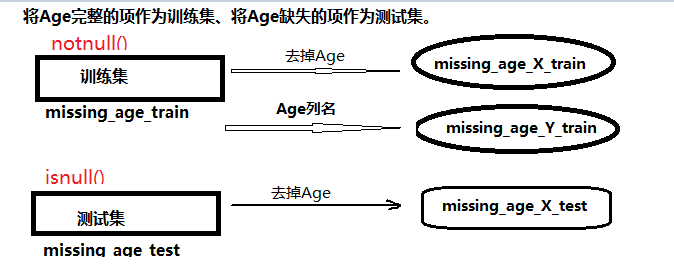

In [78]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis = 1) #Cabin: 客舱号码

#将Age完整的项作为训练集，将Age缺失的项作为测试集
missing_age_train = missing_age[missing_age['Age'].notnull()]  #完整的作为训练集
missing_age_test = missing_age[missing_age['Age'].isnull()] #缺失的作为测试集

In [79]:
#构建训练集和预测集的X和Y值
#要是有inplace = True，则表示在自身内存上修改
missing_age_X_train = missing_age_train.drop(['Age'],axis = 1)#去掉训练集的Age属性后的新训练集，不影响原来的missing_age_train

In [80]:
missing_age_train.head()

,Age,Fare,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,22.0,7.2500,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,38.0,71.2833,2,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,3,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,35.0,53.1000,4,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,35.0,8.0500,5,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
missing_age_X_train.head()

,Fare,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,7.2500,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,71.2833,2,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,7.9250,3,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,53.1000,4,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,8.0500,5,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
missing_age_Y_train = missing_age_train['Age']  #把missing_age_train的Age列名为mising_age_Y_train
missing_age_X_test = missing_age_test.drop(['Age'],axis = 1)  #比测试集missing_age_test.drop少了Age属性

In [83]:
missing_age_Y_train.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [84]:
# 先将数据标准化（因为年龄数值之间相差比较大）
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

In [85]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()

In [86]:
lin.fit(missing_age_X_train,missing_age_Y_train)  #对X_train和Y_train进行拟合，得到预测模型

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [87]:
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()),'Age'] = lin.predict(missing_age_X_test)

In [88]:
#将年龄划分为：阶段10以下，10-18,18-30,30-50,50以上
train_test['Age'] = pd.cut(train_test['Age'],bins = [0,10,18,30,50,100],labels = [1,2,3,4,5])

In [89]:
train_test = pd.get_dummies(train_test,columns =['Age'])

In [90]:
train_test.head()

,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0,Age_1,Age_2,Age_3,Age_4,Age_5
0,NaN,7.2500,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,C85,71.2833,2,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,NaN,7.9250,3,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,C123,53.1000,4,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,NaN,8.0500,5,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


- ⑨ Cabin  客舱号码

Cabin项缺失太多，只能将无Cabin首字母进行分类，缺失值为一类，作为特征值进行建模,也可以考虑舍去该特征

In [91]:
#Cabin项缺失太多，只能将有无Cabin首字母进行分类，缺失值为一类，作为特征值进行建模
train_test['Cabin_nan'] = train_test['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else x)#如果不缺失，取第一个字符，否则取原来的NaN
"""另一种表达方式：
df["VIN"]=df["VIN"].apply(lambda x: np.NaN if str(x).isspace() else x)
直接使用Series的.apply方法来修改变量VIN中的每个值。如果发现是空格，就返回Nan，否则就返回原值。
用在本例Cabin应该也是一样效果
"""
train_test.head(10)  #缺失值为一类，作为特征


,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0,Age_1,Age_2,Age_3,Age_4,Age_5,Cabin_nan
0,NaN,7.2500,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,NaN
1,C85,71.2833,2,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,C
2,NaN,7.9250,3,1,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,NaN
3,C123,53.1000,4,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,C
4,NaN,8.0500,5,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,NaN
5,NaN,8.4583,6,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0,NaN
6,E46,51.8625,7,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,E
7,NaN,21.0750,8,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,NaN
8,NaN,11.1333,9,1,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,NaN
9,NaN,30.0708,10,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,NaN


In [92]:
train_test = pd.get_dummies(train_test,columns = ['Cabin_nan']) #对缺失值进行哑编码
train_test.head(10)

,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Age_4,Age_5,Cabin_nan_A,Cabin_nan_B,Cabin_nan_C,Cabin_nan_D,Cabin_nan_E,Cabin_nan_F,Cabin_nan_G,Cabin_nan_T
0,NaN,7.2500,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,C85,71.2833,2,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,NaN,7.9250,3,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,C123,53.1000,4,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,NaN,8.0500,5,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
5,NaN,8.4583,6,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
6,E46,51.8625,7,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
7,NaN,21.0750,8,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,NaN,11.1333,9,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,NaN,30.0708,10,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#Cabin项缺失太多，只能将有无Cabin首字母进行分类
train_test.loc[train_test['Cabin'].isnull(),'Cabin_nan'] = 1    #将有缺失的记为1
train_test.loc[train_test['Cabin'].notnull(),'Cabin_nan'] = 0  #将无缺失的记为0
train_test = pd.get_dummies(train_test,columns = ['Cabin_nan']) #将Cabin_nan这一列进行哑编码
train_test.drop('Cabin',axis = 1,inplace = True)  #删除原数据内存中的Cabin这一列

In [94]:
train_test.head(10)

,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_nan_A,Cabin_nan_B,Cabin_nan_C,Cabin_nan_D,Cabin_nan_E,Cabin_nan_F,Cabin_nan_G,Cabin_nan_T,Cabin_nan_0.0,Cabin_nan_1.0
0,7.2500,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,71.2833,2,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,7.9250,3,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,53.1000,4,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,8.0500,5,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,8.4583,6,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
6,51.8625,7,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
7,21.0750,8,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,11.1333,9,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,30.0708,10,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


- ⑩ 特征工程处理完了，划分数据集

In [95]:
train_data = train_test[:891]  #从文章最开始我们可以看出，训练集有891行(0 to 890)
test_data = train_test[891:]  #剩下的418行为测试集（从891行开始）
train_data_X = train_data.drop(['Survived'],axis = 1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis = 1)

##  数据规约

1. 线性模型需要用标准化的数据建模，而树类模型不需要标准化的数据
2. 处理标准化的时候，注意将测试集的数据transform到test集上

In [96]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

##  三.建立模型

### 模型发现  
1. 可选单个模型，模型有随机森林，线性回归,svm,xgboost,gbdt等。
2. 也可以将多个模型组合起来，进行模型融合，比如voting,stacking等方法
3. 好的特征决定模型上限，好的模型和参数可以无限逼近上限。
4. 我测试了多种模型，模型结果最高的随机森林，最高0.8

### 构建模型

① 随机森林

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150,min_samples_leaf = 3,max_depth = 6,oob_score = True)
rf.fit(train_data_X,train_data_Y)  #用随机森林建立了一个模型

test['Survived'] = rf.predict(test_data_X)  #把该模型应用在test_dat_X上，得到存活率预测值
RF = test[['PassengerId','Survived']].set_index('PassengerId') #按PassengerId索引
RF.to_csv('RF_2.csv')

#### 随机森林是随机选取特征进行建模的，这点要注意

In [98]:
#随机森林是随机选取特征进行建模的，所以每次的结果可能都有点小差异
#如果分数足够好，可以将该模型保存起来，下次直接调出来使用 0.81339 'rf10.pkl'
from sklearn.externals import joblib
joblib.dump(rf,'rf10_2.pkl')

['rf10_2.pkl']

[sklearn学习笔记（一）——模型保存（pickle模块和joblib模块）](https://blog.csdn.net/ahora_wzy/article/details/51188453)  
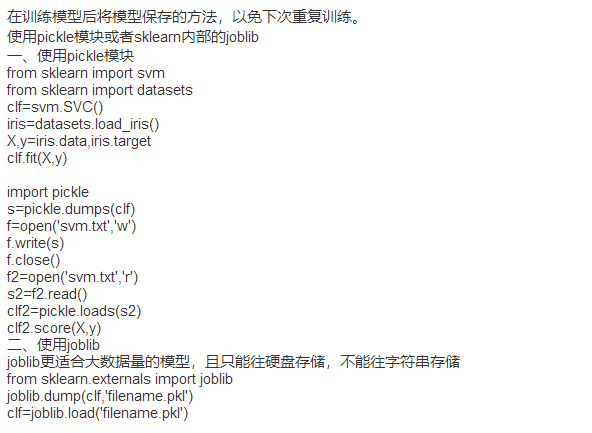


② LogisticRegression(逻辑斯蒂回归)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [100]:
lr = LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_data_X_sd, train_data_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [101]:
#打印参数的得分情况
clf.grid_scores_

[mean: 0.85620, std: 0.02658, params: {'C': 0.001, 'max_iter': 100},
 mean: 0.85620, std: 0.02658, params: {'C': 0.001, 'max_iter': 250},
 mean: 0.86942, std: 0.02957, params: {'C': 0.01, 'max_iter': 100},
 mean: 0.86942, std: 0.02957, params: {'C': 0.01, 'max_iter': 250},
 mean: 0.86390, std: 0.03389, params: {'C': 0.1, 'max_iter': 100},
 mean: 0.86390, std: 0.03389, params: {'C': 0.1, 'max_iter': 250},
 mean: 0.85562, std: 0.03649, params: {'C': 1, 'max_iter': 100},
 mean: 0.85562, std: 0.03649, params: {'C': 1, 'max_iter': 250},
 mean: 0.84942, std: 0.03825, params: {'C': 10, 'max_iter': 100},
 mean: 0.84942, std: 0.03825, params: {'C': 10, 'max_iter': 250}]

In [102]:
clf.best_params_

{'C': 0.01, 'max_iter': 100}

In [103]:
# 将最佳参数传入训练模型
lr = LogisticRegression(**clf.best_params_) #  这里注意要解包，*是解包list, **是解包字典

lr.fit(train_data_X_sd, train_data_Y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
# 输出结果
test["Survived"] = lr.predict(test_data_X_sd)
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('LS5_2.csv')

⑤ SVM

In [105]:
from sklearn import svm
svc = svm.SVC()

clf = GridSearchCV(svc,param,cv=5,n_jobs=-1,verbose=1,scoring="roc_auc")
clf.fit(train_data_X_sd,train_data_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.1s finished
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [106]:
clf.best_params_

{'C': 1, 'max_iter': 250}

In [107]:
svc = svm.SVC(C = 1,max_iter=250)

In [108]:
#训练模型并预测结果
svc.fit(train_data_X_sd,train_data_Y)
svc.predict(test_data_X_sd)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [109]:
#打印结果
test ['Survived'] = svc.predict(test_data_X_sd)
SVM = test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm1_2.csv')

③ GBDT

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate = 0.7,max_depth = 6,n_estimators = 100,min_samples_leaf=2)
gbdt.fit(train_data_X,train_data_Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.7, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=2,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [111]:
test['Survived'] = gbdt.predict(test_data_X)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('gbdt3_2.csv')

④ xgboost

In [112]:
import xgboost as xgb

In [113]:
xgb_model = xgb.XGBClassifier(n_estimators=150,min_samples_leaf =3,max_depth=6)
xgb_model.fit(train_data_X,train_data_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, min_samples_leaf=3, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [114]:
test['Survived'] = xgb_model.predict(test_data_X)
XGB = test[['PassengerId','Survived']].set_index('PassengerId')
XGB.to_csv('XGB5_2.csv')

## 建立模型

- 模型融合 voting

In [115]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression   #LogisticRegression
lr = LogisticRegression(C =0.1,max_iter=100)

In [116]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=6, min_samples_leaf =2,n_estimators=100,num_round = 5)

In [117]:
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

In [119]:
vot = VotingClassifier(estimators=[('lr',lr),('rf',rf),('gbdt',gbdt),('xgb',xgb_model)],voting='hard')
vot.fit(train_data_X_sd,train_data_Y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF... reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1))],
         n_jobs=1, voting='hard', weights=None)

In [120]:
test['Survived'] = vot.predict(test_data_X_sd)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('vot5_2.csv')

- 模型融合 stacking

In [121]:
# 划分train数据集,调用代码,把数据集名字转成和代码一样
X = train_data_X_sd
X_predict = test_data_X_sd
y = train_data_Y

'''模型融合中使用到的各个单模型'''
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = [LogisticRegression(C=0.1,max_iter=100),
        xgb.XGBClassifier(max_depth=6,n_estimators=100,num_round = 5),
        RandomForestClassifier(n_estimators=100,max_depth=6,oob_score=True),
        GradientBoostingClassifier(learning_rate=0.3,max_depth=6,n_estimators=100)]

# 创建n_folds
from sklearn.cross_validation import StratifiedKFold
n_folds = 5
skf = list(StratifiedKFold(y, n_folds))

# 创建零矩阵
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

# 建立模型
for j, clf in enumerate(clfs):
    '''依次训练各个单模型'''
    # print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):
        '''使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。'''
        # print("Fold", i)
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_predict)[:, 1]
    '''对于测试集，直接用这k个模型的预测值均值作为新的特征。'''
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

# 用建立第二层模型
clf2 = LogisticRegression(C=0.1,max_iter=100)
clf2.fit(dataset_blend_train, y)
y_submission = clf2.predict_proba(dataset_blend_test)[:, 1]

test = pd.read_csv("test.csv")
test["Survived"] = clf2.predict(dataset_blend_test)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('stack3_2.csv')